In [456]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import cross_val_score 

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Feature Selection</b></h3>

#  Домашнее задание

### Задание  

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

1. Сгенерируйте данные с помощью кода:
        from sklearn.datasets import make_classification
        x_data_generated, y_data_generated = make_classification(scale=1)
2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
        cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()
3. Используйте статистические методы для отбора признаков:
        a) Выберите признаки на основе матрицы корреляции.
        b) Отсеките низковариативные признаки (VarianceThreshold).
        c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.
4. Осуществите отбор признаков на основе дисперсионного анализа:
        a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации 
            f_classif (SelectKBest(f_classif, k=5)).
        b) Повторите п. 2 на отобранных признаках.
5. Отбор с использованием моделей:
        a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
        b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
        c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.
    Перебор признаков:
        a) SequentialFeatureSelector.
        b) Повторите п. 2 на отобранных признаках.
6. Сформулируйте выводы по проделанной работе:
        a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

##### 1. Сгенерируйте данные с помощью кода

In [457]:
# x_data_generated_save, y_data_generated_save = make_classification(scale=1)

In [580]:
x_data_generated, y_data_generated = x_data_generated_save, y_data_generated_save

In [581]:
x_data_generated

array([[-0.37941238, -0.06514219,  1.05094043, ...,  1.11655985,
         1.88288927,  0.18592051],
       [-1.11265883, -0.56117615,  2.95010838, ...,  0.83460421,
         0.01916098, -0.11911029],
       [ 0.89094439,  1.45893179,  0.11108347, ..., -0.47391519,
         0.21342491,  1.47756578],
       ...,
       [ 0.64712156, -0.63461822, -0.2987722 , ..., -1.48344082,
         0.9731436 , -0.79606588],
       [ 1.9396996 , -0.35345179, -0.94797636, ...,  0.87363275,
         0.50195285, -2.66930062],
       [ 0.81633537, -0.31499359, -0.7375476 , ...,  0.70591586,
         0.65980256, -1.75468091]])

In [582]:
y_data_generated

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [583]:
x_data_generated = pd.DataFrame(x_data_generated)
x_data_generated.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.379412,-0.065142,1.050940,-0.470557,-0.933596,1.036821,1.444038,0.806234,0.752496,-0.908754,0.190427,0.233832,0.230102,0.683463,1.291088,0.326902,1.522905,1.116560,1.882889,0.185921
1,-1.112659,-0.561176,2.950108,-0.428157,-1.239682,-0.903229,0.063045,-1.107385,-2.892401,-1.909055,1.344493,0.101616,-0.464914,0.050917,1.453786,0.722617,1.231469,0.834604,0.019161,-0.119110


In [584]:
y_data_generated = pd.DataFrame(y_data_generated)
y_data_generated.head(2)

,0
0,1
1,1


###### 2. Постройте модель логистической регрессии и оцените среднюю точность.

In [585]:
model = LogisticRegression()

In [586]:
cross_val_score(model, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.82

##### 3. Используйте статистические методы для отбора признаков:

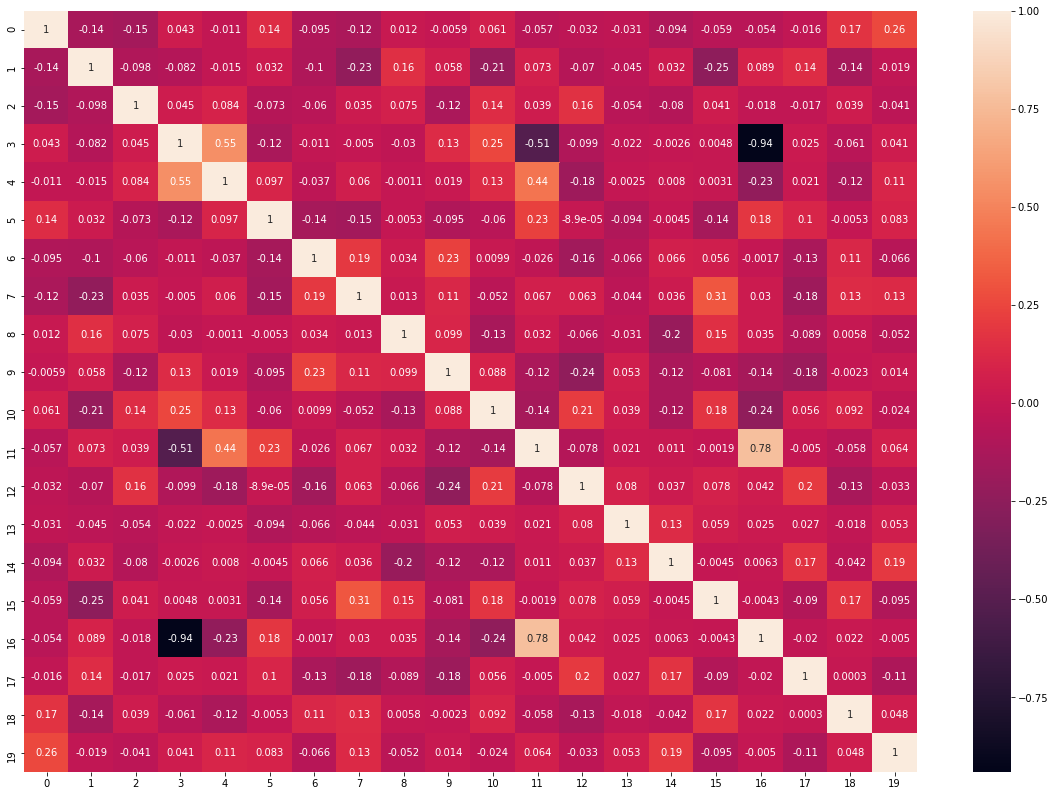

In [587]:
corr = x_data_generated.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr,annot=True)
plt.show()

        a) Выберите признаки на основе матрицы корреляции.

In [588]:
#  Коррелирующие признаки :  3, 11, 16
f_3a = [3, 11, 16]

In [589]:
features_3a = [i for i in range(20) if i not in f_3a]
print(f'Выявленные незначимые признаки: {features_3a}')

Выявленные незначимые признаки: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19]


In [590]:
x_data_generated = x_data_generated.drop(features_3a, axis=1)
x_data_generated.shape

(100, 3)

In [591]:
model_3a = LogisticRegression()

In [592]:
cross_val_score(model_3a, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.86

        b) Отсеките низковариативные признаки (VarianceThreshold).

In [660]:
x_data_generated = pd.DataFrame(x_data_generated_save)
y_data_generated = pd.DataFrame(y_data_generated_save)

In [661]:
selector = VarianceThreshold(threshold = 1.1)
s = selector.fit_transform(x_data_generated)

In [662]:
ftr = selector.get_support()

In [663]:
print(f'Выявленные значимые признаки: {[i for i, e in enumerate(ftr) if e]}')

Выявленные значимые признаки: [0, 4, 9, 16]


In [664]:
concol = [i for i, e in enumerate(ftr) if not e]
print(f'Выявленные незначимые признаки: {concol}')

Выявленные незначимые признаки: [1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19]


In [665]:
x_data_generated = x_data_generated.drop(concol,axis=1)
x_data_generated.shape

(100, 4)

        c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.       

In [666]:
model1 = LogisticRegression()

In [667]:
cross_val_score(model1, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8700000000000001

##### 4. Осуществите отбор признаков на основе дисперсионного анализа:
        a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации 
            f_classif (SelectKBest(f_classif, k=5)).

In [620]:
x_data_generated = pd.DataFrame(x_data_generated_save)
y_data_generated = pd.DataFrame(y_data_generated_save)

In [621]:
select = SelectKBest(k=5)
z = select.fit_transform(x_data_generated, y_data_generated)

In [623]:
filter_ = select.get_support()
features = x_data_generated.columns
print(filter_, '\n')
print(f"Выбранные 5 лучших признаков: {features[filter_]}")

[False False False  True False  True False False False False  True  True
 False False False False  True False False False] 

Выбранные 5 лучших признаков: Int64Index([3, 5, 10, 11, 16], dtype='int64')


        b) Повторите п. 2 на отобранных признаках.

In [624]:
concol2 = [i for i, e in enumerate(filter_) if not e]
print(f'Выявленные незначимые признаки: {concol2}')

Выявленные незначимые признаки: [0, 1, 2, 4, 6, 7, 8, 9, 12, 13, 14, 15, 17, 18, 19]


In [625]:
x_data_generated = x_data_generated.drop(concol2,axis=1)
x_data_generated.shape

(100, 5)

In [626]:
model2 = LogisticRegression()

In [627]:
cross_val_score(model2, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8400000000000001

##### 5. Отбор с использованием моделей:
        a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [673]:
x_data_generated = pd.DataFrame(x_data_generated_save)
y_data_generated = pd.DataFrame(y_data_generated_save)

In [674]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
zz = sel_.fit(x_data_generated, y_data_generated)

In [675]:
filter1 = sel_.get_support()

print(f'Выявленные значимые признаки: {[i for i, e in enumerate(filter1) if e]}')

Выявленные значимые признаки: [1, 2, 4, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19]


In [676]:
concol3 = [i for i, e in enumerate(filter1) if not e]
print(f'Выявленные незначимые признаки: {concol3}')

Выявленные незначимые признаки: [0, 3, 5, 11, 13]


In [677]:
x_data_generated = x_data_generated.drop(concol3,axis=1)
x_data_generated.shape

(100, 15)

In [678]:
model3 = LogisticRegression()

In [679]:
cross_val_score(model3, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8700000000000001

        b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

        c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [680]:
x_data_generated = pd.DataFrame(x_data_generated_save)
y_data_generated = pd.DataFrame(y_data_generated_save)

In [681]:
forest = RandomForestClassifier()
forest.fit(x_data_generated, y_data_generated)

RandomForestClassifier()

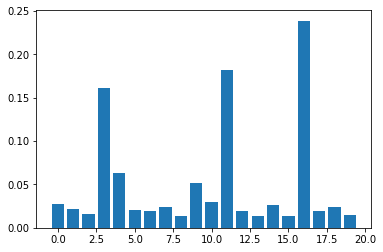

In [682]:
importance = forest.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [683]:
concol4 = [i for i, e in enumerate(importance) if e < 0.1]
print(f'Выявленные незначимые признаки: {concol4}')

Выявленные незначимые признаки: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19]


In [684]:
x_data_generated = x_data_generated.drop(concol4,axis=1)
x_data_generated.shape

(100, 3)

In [685]:
model4 = LogisticRegression()

In [686]:
cross_val_score(model4, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.86

###### Перебор признаков:
        a) SequentialFeatureSelector.

In [692]:
x_data_generated = pd.DataFrame(x_data_generated_save)
y_data_generated = pd.DataFrame(y_data_generated_save)

In [693]:
feature_select = SequentialFeatureSelector(LogisticRegression())
feature_select.fit(x_data_generated, y_data_generated)
fiter_features = feature_select.support_

In [694]:
features_true = [i for i, e in enumerate(fiter_features) if e]
print(f'Выявленные значимые признаки: {features_true}')

Выявленные значимые признаки: [0, 2, 3, 4, 5, 7, 11, 12, 14, 16]


In [695]:
concol5 = [i for i, e in enumerate(fiter_features) if not e]
print(f'Выявленные незначимые признаки: {concol5}')

Выявленные незначимые признаки: [1, 6, 8, 9, 10, 13, 15, 17, 18, 19]


        b) Повторите п. 2 на отобранных признаках.

In [696]:
x_data_generated = x_data_generated.drop(concol5,axis=1)
x_data_generated.shape

(100, 10)

In [697]:
model5 = LogisticRegression()

In [698]:
cross_val_score(model5, x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8800000000000001

###### 6. Сформулируйте выводы по проделанной работе:
        a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

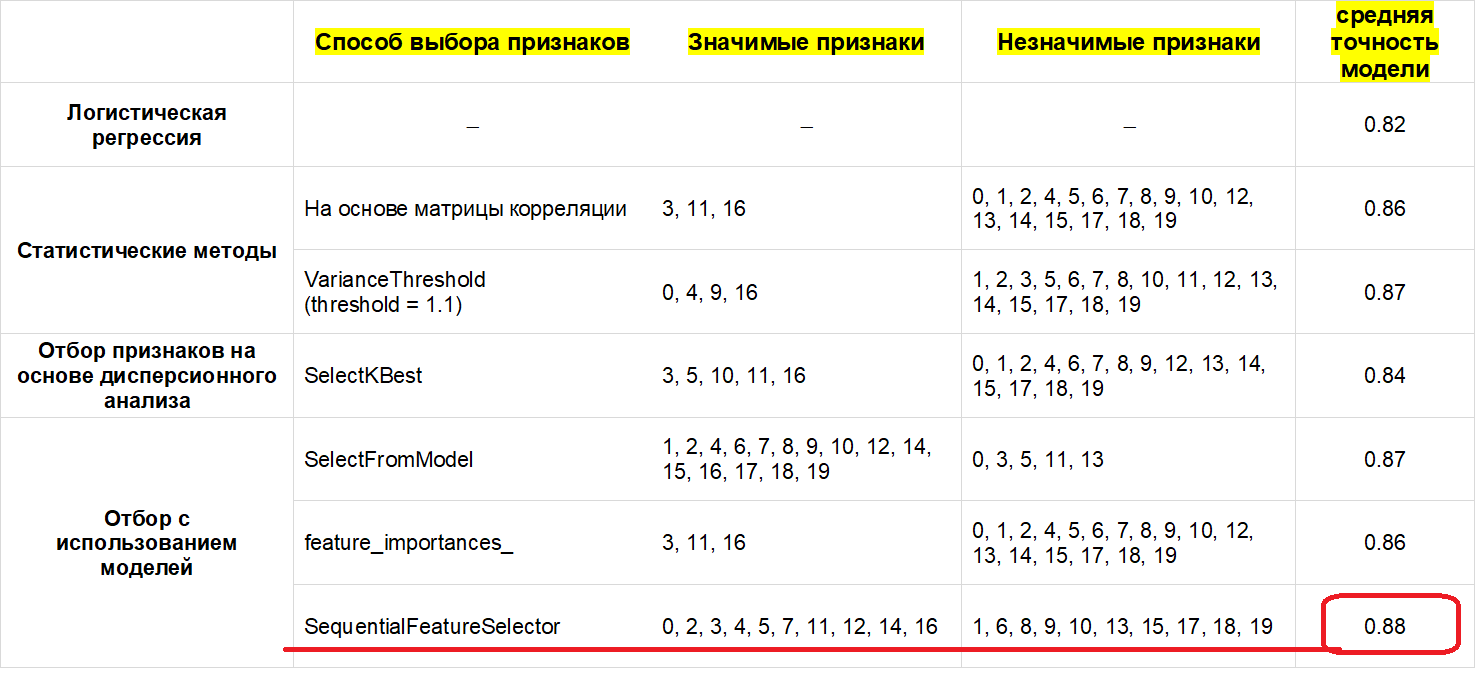

### ВЫВОДЫ: 

Отбрасывая незначительные признаки можно улучшить качество модели.
Визуальный медот на основе матирицы коррелляции  уже дает видимый эффект.
Наилучшее качество в определении важных признаков показал метод с использованием моделей, а именно метод перебора признаков SequentialFeatureSelector.